# Creating a StockTwits App

In [1]:
Token='37a64a04436d7d772661a9d45161f6ac12bac5ef'

SyntaxError: invalid syntax (<ipython-input-1-4f771c9d4878>, line 1)

In [3]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import nltk
import numpy as np
import datetime,time
import seaborn as sns
import matplotlib.pyplot as plt
params = (('access_token', '37a64a04436d7d772661a9d45161f6ac12bac5ef'),)

# Trending Symbol
Returns a list of all the trending symbols at the moment requested. Trending symbols include equties and non-equities like futures and forex. These are updated in 5-minute intervals.


In [5]:
Trending = requests.get('https://api.stocktwits.com/api/2/trending/symbols.json', params=params).json()



 Getting the dataframe and soring it for max of watchlist

In [6]:
Trending_Stocks=pd.DataFrame(Trending['symbols']).sort_values(by=['watchlist_count'],ascending=False,ignore_index=True)

Getting the top 5 Stocks 

In [7]:
Top_Five_Stocks=np.array(Trending_Stocks['symbol'][0:5])

In [8]:
Trending_Stocks

,id,symbol,title,aliases,is_following,watchlist_count
0,2839,NFLX,"Netflix, Inc.",[],False,294595
1,11418,BTC.X,Bitcoin BTC/USD,[BTCUSD],False,196519
2,11746,SNAP,Snap Inc.,[],False,155557
3,13016,ETH.X,Ethereum,[ETHUSD],False,79499
4,15438,SPCE,Virgin Galactic,[],False,68905
5,12608,PYPL,PayPal,[],False,62233
6,14489,IQ,iQIYI,[],False,30811
7,12886,WORK,Slack,"[SLACK, SK]",False,29506
8,15228,FSLY,Fastly,[],False,25948
9,15382,PTON,Peloton,[],False,25844


# Getting the sentiment for the Stock Symbol

The below funtion get input of the symbol and outputs a dataframe 

Symbol	Bearish	Bullish	Time

In [68]:
def GetSentiment(Symbol):

    Link="https://api.stocktwits.com/api/2/streams/symbol/{}.json".format(Symbol)
    Token=requests.get(Link).json()
    Sent=nltk.word_tokenize(json.dumps(Token))
    Data={'Symbol':Symbol,'Bearish':Sent.count('Bearish'),'Bullish':Sent.count('Bullish'),'Time':datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')}
    return pd.DataFrame.from_dict(Data,orient='index').transpose()

In [69]:
for symbol in Top_Five_Stocks:
    df=df.append(GetSentiment(symbol),ignore_index=True)
df['Bullish']=df['Bullish'].astype(int)
df['Bearish']=df['Bearish'].astype(int)

In [71]:
df

,Symbol,Bearish,Bullish,Time
0,NFLX,7,4,2020-10-21 13:06:10
1,NFLX,7,4,2020-10-21 13:06:10
2,BTC.X,2,12,2020-10-21 13:06:10
3,SNAP,11,7,2020-10-21 13:06:11
4,ETH.X,0,17,2020-10-21 13:06:11
5,SPCE,0,20,2020-10-21 13:06:11
6,NFLX,7,4,2020-10-21 13:06:34
7,BTC.X,3,9,2020-10-21 13:06:34
8,SNAP,11,4,2020-10-21 13:06:35
9,ETH.X,0,15,2020-10-21 13:06:35


In [70]:
df.groupby('Symbol').mean()

,Bearish,Bullish
Symbol,,
BTC.X,2.4,10.400000
ETH.X,0.0,15.800000
NFLX,7.0,4.166667
SNAP,11.8,5.600000
SPCE,0.4,17.800000


In [72]:
df_plot=df[['Symbol','Bearish','Bullish']].melt(id_vars=['Symbol'], var_name='Sentiment', value_name='Values')

<AxesSubplot:xlabel='Symbol', ylabel='Values'>

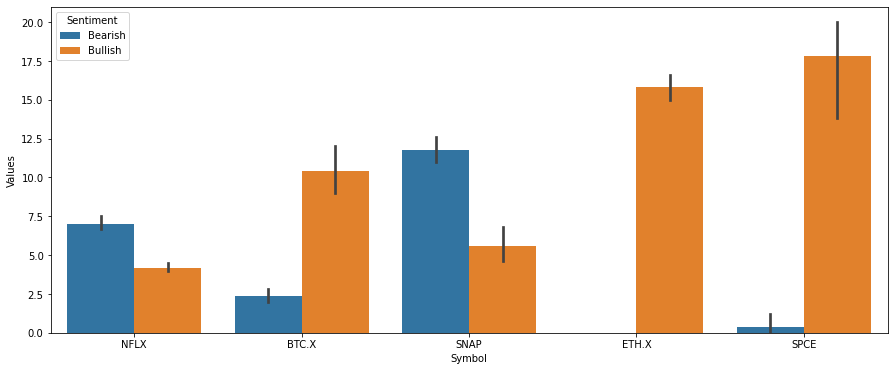

In [73]:
fig=plt.figure(figsize=(15,6))
sns.barplot(x="Symbol", y="Values", hue="Sentiment",data=df_plot)

In [74]:
df.describe()

,Bearish,Bullish
count,26.000000,26.000000
mean,4.423077,10.500000
std,4.570979,5.914389
min,0.000000,4.000000
25%,0.000000,4.250000
50%,2.500000,9.000000
75%,7.000000,15.000000
max,13.000000,20.000000
